### Importing Needed packages


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


<h2 id="reading_data">Reading the data in</h2>


In [10]:
df = pd.read_csv("50_Startups.csv")

# take a look at the dataset
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Select x (Features) & y (Target)


In [16]:
x = df.iloc[:,:4].values
y = df.iloc[:,4].values

Now run the following cell to see the data

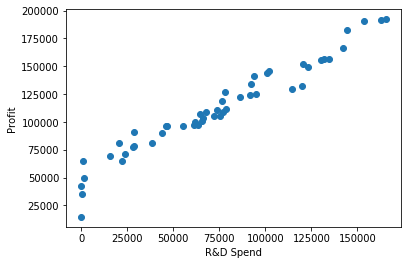

In [19]:
plt.scatter(x[:,0],y)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

# Applying Data Preprocessing 

Note :
- there is no missing data so we will skip this step

In [21]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
x = onehotencoder.fit_transform(x).toarray()


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.


In [25]:

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [30]:
# Scaling Features

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.transform(y_test.reshape(-1, 1))

# Now we can bulid our model

1- Dealing with Dimensions:

- x_train  -> (n , m_train)
- x_test   -> (n , m_test)
- y_train  -> (1 , m_test)
- y_test   -> (1 , m_test)

Note:
- use ' x.shape ' to know dimensions of an array and ' x.reshape() ' to reshape 1 Rank array (size,)
- use 'x.T' to transpose 2D array



In [ ]:
# checking Diemensions of dataset

### START CODE HERE ###


### END CODE HERE ###

In [ ]:
# Reshape your data

### START CODE HERE ###

### END CODE HERE ###

# Gradient descent

2- Initialize parameters (w,b)

- w.shape(n,1)  
- b.shape(1,1)

Note: w is array of zeros, so you can use ' np.zeros((n,1)) '

In [ ]:
def initialize_parameters(x):
    '''
    This function initialize the parameters w,b by zeros
    
    returns:
    w: the weights term
    b: the bias term
    '''
    n = x.shape[0] 
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    return w,b

3- calculate hypothesis 
$$ z = w^T x +b $$

Note:
- you can use 'np.dot(x,y)' to perform matrix multiplcation


In [ ]:
def hypothesis_function(x,w,b):
    '''
    This function Calculate the predictions or hypothesis
    h(w,b)
    
    returns:
    y_hat : our predictions 
    '''
    ### START CODE HERE ###
   
    ### END CODE HERE ###
    
    return y_hat

Calculate the cost function
$$J = 1/2m   \Sigma^{m}_{i=1}(y^{(i)}-h_{w,b}(x^{(i)}))^{2} $$

In [ ]:
def cost_func(y,y_hat):
    '''
    This function calculates the cost 
    
    arguments: 
    y: the real value of the target
    y_hat: the predicted value
    
    returns the cost funtion Cost
    '''
    #Your Code Here
    #add in the video
    
    #Your Code Ends Here
    
    return Cost


Calculate the gradients:
$$ h = w^{T} X +b$$
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(h_{w,b}(x)-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h_{w,b}(x^{(i)})-y^{(i)})$$

We will assume that:
$$ \frac{\partial J}{\partial w} = dw $$
$$ \frac{\partial J}{\partial b} = db $$
Note:
- you can use 'np.dot()' for matrix multiplcation 
- you can use 'np.sum()' to calculate sum of an array

In [ ]:
def calc_gradients(x,y,y_hat):
    '''
    This Function is to calculate the gradients of the parameters
    
    returns:
    dw , db: the gradient of the parameters
    '''
    m = y.shape[1]
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    
    return dw,db

# Apply Gradient descent 
To update the parameters

<br>
The update rule of any parameter: 
<br>
$ w = w - \alpha \text{ } dw$, where $\alpha$ is the learning rate.
- you can use 'Cost.append(cost)',so that you can plot costfunction graph 

In [ ]:
def gradient_descent(x,y,epochs =10000,learning_rate=0.001):
    '''
    arguments:
    x: the feature matrix with shape (n,m)
    y: the target vector with shape (1,m)
    epochs: the number of iterations
    learning_rate
    
    returns:
    w,b,Cost as Cost is a list of the cost each 100 iterations
    '''
    Cost = []
   
    #Your Code Here
  
    m = x.shape[1]       #number of training examples
    #Your Code Ends Here
    
    #Initialize w,b using the function impelemented above
    #Your Code Here
  
    #Your Code Ends Here
    
    for i in range(epochs):
        #Calculate the gradients and update parameters
        #Your Code Starts Here
       
        if i%100 == 0:
            # calculate cost and store it in Cost list
            
        ### END CODE HERE ###
        
    return w,b,Cost
        

# Now train your model

In [ ]:
 # training our model
 #Your Code Starts Here

    
 ### END CODE HERE ###   

# See your predictions and cost function

In [ ]:
# ploting Cost function 


index = []
for i in range(len(Cost)):
    index.append(i)
plt.plot(index,Cost,label='cost')
plt.title('Dataset')
plt.xlabel('# of iterations')
plt.ylabel('Cost function')
plt.legend()
plt.show()


In [ ]:
# calculate cost of testing set
# calculate y_hat using x_test and hypothesis function
# calculate cost function using y_hat and y_test
#Your Code Starts Here

    
### END CODE HERE ###   